# Métricas Abrangentes de Sono e Saúde
---

### Contexto

### Objetivo

**Índice**

1. [Importação e Personalização](#importação-e-personalização)
2. [Preparação dos dados](#preparação-dos-dados)
3. [Vizualizações de Distribuição](#vizualizações-de-distribuição)
4. [Modelo RandonForest](#modelo-randonforest)


### Importação e Personalização
---

In [64]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Personalização
%matplotlib inline
plt.rc("figure", figsize=(8, 6))
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

### Preparação dos dados
---

O arquivo **wearable_tech_sleep_quality_1.csv** contém vários valores numéricos com 12 casas decimais. Para melhorar a legibilidade e a clareza dos dados, os valores numéricos foram formatados para 2 casas decimais.

In [55]:
# Carregando DataFrame 
df = pd.read_csv("./wearable_tech_sleep_quality_1.csv").round(2)
df.head(10)

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.93,37.20,1.32,4.64,1.00,107.62,2.77,0.66,7.93
1,67.23,36.96,1.86,6.21,1.00,104.66,3.74,0.14,6.99
2,82.95,36.53,1.21,6.88,10.00,0.00,3.12,0.64,7.66
3,100.46,36.18,1.69,10.33,1.00,116.99,3.90,0.45,9.43
4,65.32,36.85,0.11,8.33,1.00,223.28,4.57,0.64,10.56
5,65.32,36.70,2.21,5.50,7.12,22.58,6.67,0.66,9.14
6,101.58,36.95,2.00,8.23,1.00,254.85,4.36,0.82,8.20
7,85.35,36.82,1.18,5.18,1.00,198.78,1.83,0.77,11.00
8,60.61,37.02,2.66,9.12,2.41,76.58,7.28,0.77,7.37
9,80.85,36.23,2.94,6.79,1.00,135.85,3.33,0.79,10.06


In [56]:
# Resumo de informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [57]:
# Verificando valores duplicados e ausentes
print(f"""Valores duplicados: {df.duplicated().sum()}\n
Valores ausentes: \n{df.isnull().sum()}
""")

Valores duplicados: 0

Valores ausentes: 
Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64



In [58]:
# Estatística Descretiva 
df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,70.386740,36.535520,2.005680,7.471940,2.592890,148.260150,4.94085,0.504090,8.036650
std,19.584339,0.498859,0.983589,1.540611,2.979468,94.031744,2.03256,0.204154,2.023352
min,5.170000,35.030000,-1.020000,3.110000,1.000000,0.000000,0.00000,0.000000,0.330000
25%,57.050000,36.200000,1.350000,6.390000,1.000000,80.627500,3.49000,0.360000,6.730000
50%,70.505000,36.530000,2.000000,7.500000,1.000000,145.715000,4.89000,0.500000,8.040000
75%,82.955000,36.862500,2.662500,8.502500,2.540000,211.242500,6.40250,0.640000,9.352500
max,147.050000,38.100000,5.930000,12.360000,10.000000,400.000000,10.00000,1.000000,14.750000


In [59]:
# Filtragem de valores negativos na coluna "Movement_During_Sleep"
df = df.loc[df["Movement_During_Sleep"] > 0]
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.93,37.20,1.32,4.64,1.00,107.62,2.77,0.66,7.93
1,67.23,36.96,1.86,6.21,1.00,104.66,3.74,0.14,6.99
2,82.95,36.53,1.21,6.88,10.00,0.00,3.12,0.64,7.66
3,100.46,36.18,1.69,10.33,1.00,116.99,3.90,0.45,9.43
4,65.32,36.85,0.11,8.33,1.00,223.28,4.57,0.64,10.56
...,...,...,...,...,...,...,...,...,...
995,64.38,37.04,2.08,7.54,1.00,167.15,4.40,0.94,8.20
996,105.95,36.49,2.26,4.38,1.00,265.26,6.54,0.57,10.33
997,82.82,36.06,0.76,7.02,8.45,28.26,3.95,0.33,11.18
998,58.58,36.42,2.33,9.97,1.00,196.80,4.99,0.83,6.63


In [60]:
# Oberservando a contagem de valores da coluna "Sleep_Quality_Score"
df["Sleep_Quality_Score"].value_counts()

Sleep_Quality_Score
1.00     684
10.00     64
2.90       3
9.73       3
4.02       2
        ... 
8.05       1
6.56       1
4.75       1
8.37       1
7.08       1
Name: count, Length: 205, dtype: int64

**Nota:** Desbalanceamento na coluna **Sleep_Quality_Score**, onde possui uma grande quantidade de valores concentrados em um número específico (1.00) e poucas observações em outros valores

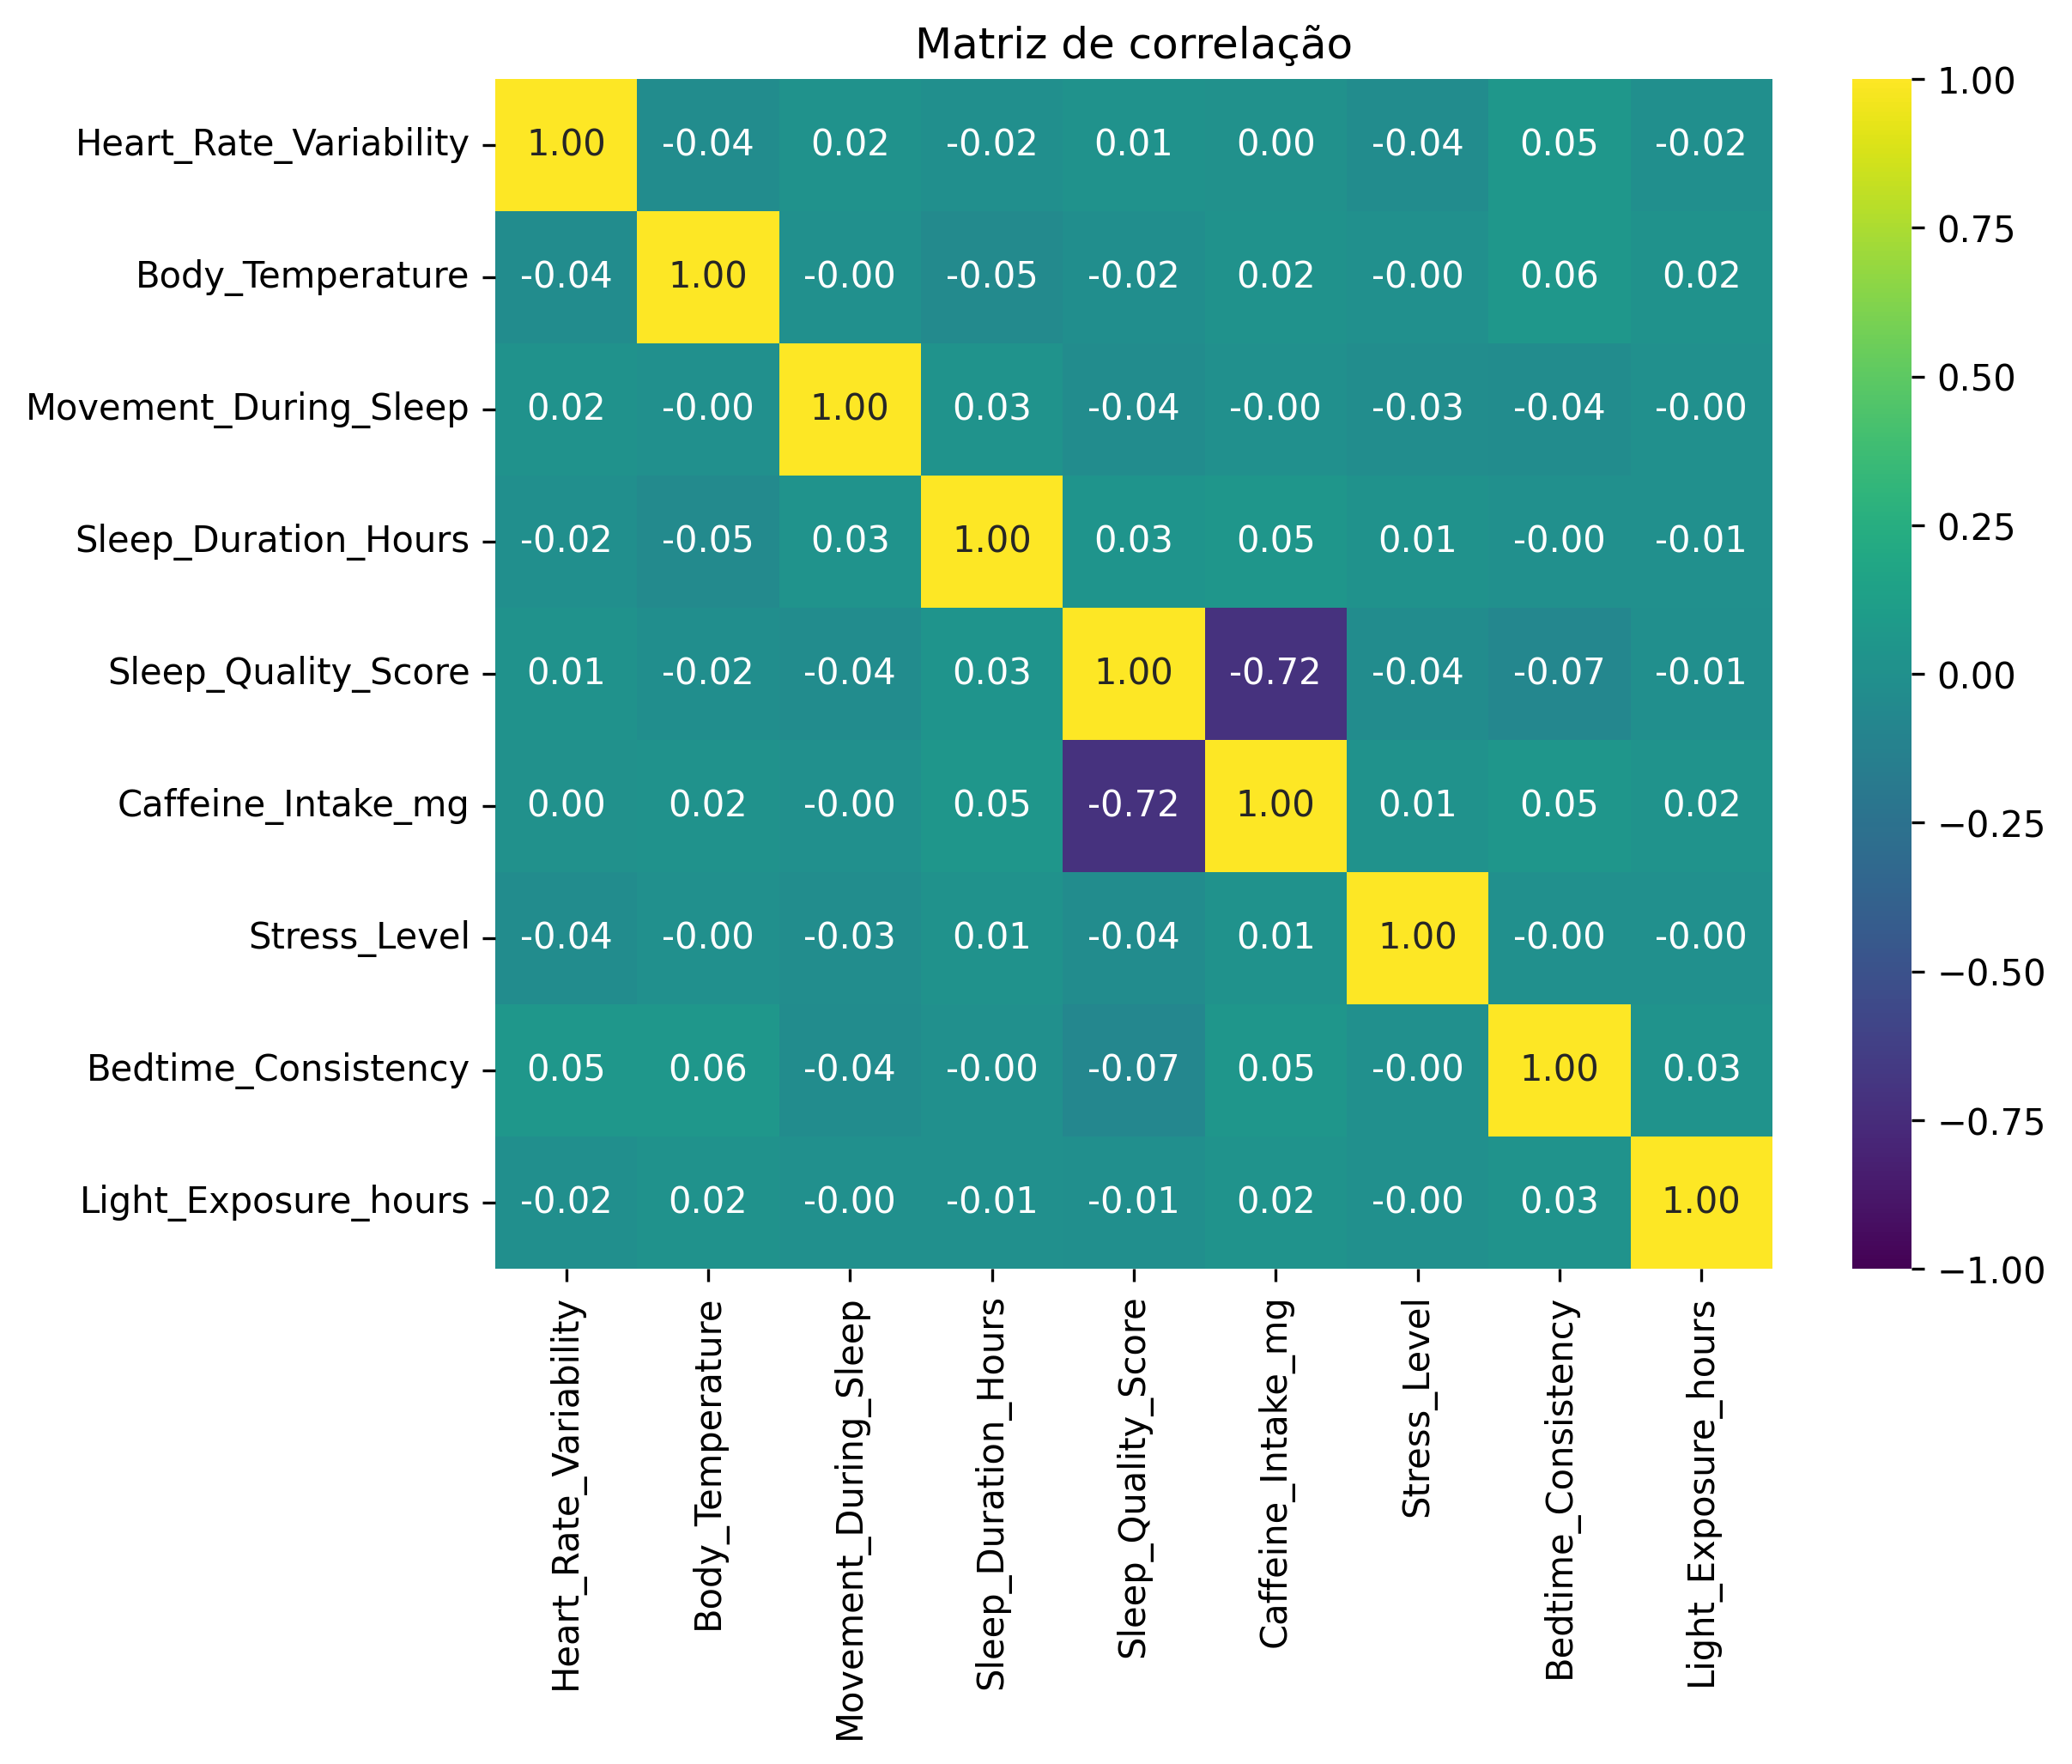

In [104]:
corr_matrix = df.corr()

ax = sns.heatmap(corr_matrix,
                 vmin=-1,
                 vmax=1,
                 cmap="viridis",
                 annot=True,
                 fmt=".2f"
                 )
ax.set_title("Matriz de correlação")
plt.show()

In [105]:
corr_matrix_score = corr_matrix["Sleep_Quality_Score"].sort_values(ascending=False)
corr_matrix_score

Sleep_Quality_Score       1.000000
Sleep_Duration_Hours      0.033626
Heart_Rate_Variability    0.014026
Light_Exposure_hours     -0.013877
Body_Temperature         -0.021851
Stress_Level             -0.035887
Movement_During_Sleep    -0.036804
Bedtime_Consistency      -0.072334
Caffeine_Intake_mg       -0.718591
Name: Sleep_Quality_Score, dtype: float64

### Vizualizações de Distribuição
---

### Modelo RandonForest
---